In [7]:
from uproot_io import Events, View
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [8]:
events = Events(r"C:\Users\andre\Desktop\Physics Project\bigdata\CheatedRecoFile_1.root")

In [9]:
event_numbers = np.array(list(set(events.event_number)))
event_numbers, len(event_numbers)

(array([   0,    1,    2, ..., 9307, 9308, 9309]), 9310)

In [11]:
def labelling():
    label = []
    
    for n in event_numbers:
        mcp = []
        index = np.where(events.event_number == n)[0]

        for i in index:
            parent = events.reco_parent_index[i]
            if parent == 0:
                mcp.append(events.mc_pdg[i])
        
        if 13 in mcp and 11 in mcp:
            label.append(3)
        
        elif 13 in mcp or -13 in mcp:
            label.append(0)

        elif 11 in mcp or -11 in mcp:
            label.append(1)    
            
        else:
            label.append(2)
            
    return np.array(label)

In [12]:
labels = labelling()

9310


((array([3492.,    0.,    0., 3715.,    0.,    0., 2083.,    0.,    0.,
           20.]),
  array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
  <BarContainer object of 10 artists>),
 None)

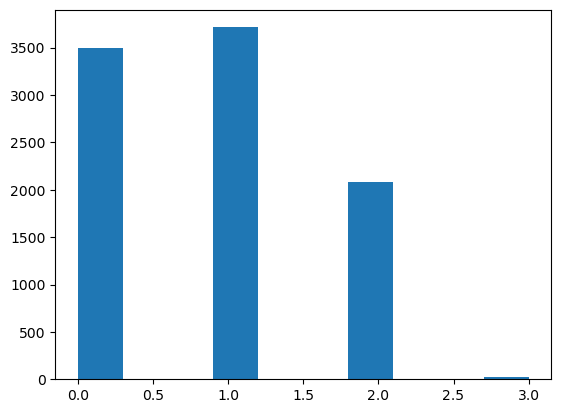

In [13]:
plt.hist(labels), print(len(labels))

In [16]:
def oneHotLabelling():
    label = []
    
    for n in event_numbers:
        mcp = []
        index = np.where(events.event_number == n)[0]

        for i in index:
            parent = events.reco_parent_index[i]
            if parent == 0:
                mcp.append(events.mc_pdg[i])
                
        if 13 in mcp or -13 in mcp:
            label.append([1,0,0])

        elif 11 in mcp or -11 in mcp:
            label.append([0,1,0])
            
        else:
            label.append([0,0,1])
            
    return np.array(label).astype(float)

In [17]:
one_hot_labels = oneHotLabelling()

In [18]:
one_hot_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])